In [2]:
import requests
import random
cookies = {
    '_ga': 'GA1.1.763349015.1701265994',
    'wnbell_last_count': '1',
    'pll_language': 'bg',
    '__wpdm_client': 'd72a32eeb062cd08e39786a0f47db4b4',
    '_ga_5LBFZ1MK81': 'GS1.1.1714041511.12.1.1714042535.0.0.0',
}

headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'content-type': 'application/x-www-form-urlencoded',
    # 'cookie': '_ga=GA1.1.763349015.1701265994; wnbell_last_count=1; pll_language=bg; __wpdm_client=d72a32eeb062cd08e39786a0f47db4b4; _ga_5LBFZ1MK81=GS1.1.1714041511.12.1.1714042535.0.0.0',
    'origin': 'https://ibex.bg',
    'priority': 'u=0, i',
    'referer': 'https://ibex.bg/%d0%b4%d0%b0%d0%bd%d0%bd%d0%b8-%d0%b7%d0%b0-%d0%bf%d0%b0%d0%b7%d0%b0%d1%80%d0%b0/%d0%bf%d0%b0%d0%b7%d0%b0%d1%80%d0%b5%d0%bd-%d1%81%d0%b5%d0%b3%d0%bc%d0%b5%d0%bd%d1%82-%d0%b4%d0%b5%d0%bd-%d0%bd%d0%b0%d0%bf%d1%80%d0%b5%d0%b4/aggregated-curves-bg/',
    'sec-ch-ua': '"Chromium";v="124", "Google Chrome";v="124", "Not-A.Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36',
}
# promqna da datata i chasa
data = {
    'date': '2024-04-20',
    'singleHour': '14',
}

# data['date']= "2024-"+str(random.randint(2, 4))+"-"+str(random.randint(8, 29))
# data['singleHour']=str(random.randint(0, 23))
# day=  data['date']+ "_"+data["singleHour"]
data['date']="2024-4-12"
data['singleHour']='15'
day="2024-4-12_155"
response = requests.post(
    'https://ibex.bg/%d0%b4%d0%b0%d0%bd%d0%bd%d0%b8-%d0%b7%d0%b0-%d0%bf%d0%b0%d0%b7%d0%b0%d1%80%d0%b0/%d0%bf%d0%b0%d0%b7%d0%b0%d1%80%d0%b5%d0%bd-%d1%81%d0%b5%d0%b3%d0%bc%d0%b5%d0%bd%d1%82-%d0%b4%d0%b5%d0%bd-%d0%bd%d0%b0%d0%bf%d1%80%d0%b5%d0%b4/aggregated-curves-bg/',
    cookies=cookies,
    headers=headers,
    data=data,
)

# print(response.content)
TrimedS = str(response.content).replace(";\\t\\t\\t\\t\\t\\t\\t\\t\\r\\n\\t\\tvar","")
TrimedS =TrimedS.replace("=",":")
TrimedS = TrimedS.replace(";\\r\\n\\t\\tvar","")

file = open('myfile.txt', 'w')
file.write(TrimedS)
file.close()
keyWords=["sellData","buyData","[","]"]
count=[0,0]
flag =0
flagEnd =0
with open("myfile.txt", 'r') as file:
    for line in file:
  
        # reading each word        
        for word in line.split():
            if(word!=keyWords[0] and flag==0):
                count[0]=count[0]+1
            else: flag=1
            if(word!=keyWords[3]):
                count[1]=count[1]+1
            elif(flagEnd<1):
                flagEnd= flagEnd+1
                count[1]=count[1]+1
            else: break
        masivOtDumi= line.split()
        file1 = open("final.txt", 'w')
        file1.write("{")
        try:
            for i in range(count[0],count[1]+1):
                if(masivOtDumi[i]=="buyData"):
                    file1.write(", ")
                file1.write(masivOtDumi[i])
            file1.write("}")
        except:
            print("Nqma takava data")
file1.close()           
file.close()

Nqma takava data


In [19]:
# data = {
#     'date': '2024-04-23',
#     'singleHour': '14',
# }
day=  data['date']+ "_"+data["singleHour"]
jsonName = str(day)+".json"
print(day)
jF= open(jsonName,"w")
with open('final.txt',"rb") as f:
     
    while True:
        c = f.read(1).decode("utf-8")
        if not c:
            break
        if(c=='x'):
            jF.write("\"")
            jF.write(c)
            jF.write("\"")
        elif(c=='y'):
            yC = f.read(1).decode("utf-8")
            if(yC=='D'): 
                jF.write(c)
                jF.write(yC)
            else:
                jF.write("\"")
                jF.write(c)
                jF.write("\"")
                jF.write(":")
        elif(c=='s'or c=='b'):
            jF.write("\"")
            jF.write(c)
        elif(c=='a'):
            d = f.read(1).decode("utf-8")
            if(d!='t'):
                jF.write(c)
                jF.write("\"")
                jF.write(":")
            else: 
                jF.write(c)
                jF.write(d)
        elif(c=='{' or c=='['):
            jF.write(c)
            jF.write("\n")
        elif(c=='}'):
            jF.write("\n")
            jF.write(c)
        elif(c==','):
            comma = f.read(1).decode("utf-8")
            if(comma==']'):jF.write("\n")
            # elif(comma=='y'):
            #     yC = f.read(1)
            #     if(yC=='D'): 
            #         jF.write(comma)
            #         jF.write(yC)
            #     else:
            #         jF.write("\n")
            #         jF.write("\"")
            #         jF.write(comma)
            #         jF.write("\"")
            #         jF.write(":")
            else:
                jF.write(c)
                jF.write("\n")
            f.seek(-1, 1)
        else:jF.write(c)
f.close()
jF.close()
        

2024-4-12_15


Razlika mejud dvete strogi tochki sell
3
(2006.2999999999856, 300.01000000000573)
proverka 2006.3 2006.3 300.01 300.9
dobavqne kum closestS
(2006.2999999995907, 300.0100000000058)
proverka 2006.3 2006.3 300.01 301.0
dobavqne kum closestS
(2006.3000000100203, 300.0100000000058)
Razlika mejud dvete strogi tochki buy
2
izvajdane ot closestB
(2006.3000000100203, 300.0064202134488)
Sell closest
2006.3 301.0
2006.3 301.01
2006.3 304.99
Buy closest
2056.23 300.0
1978.46 300.01
1966.02 300.01


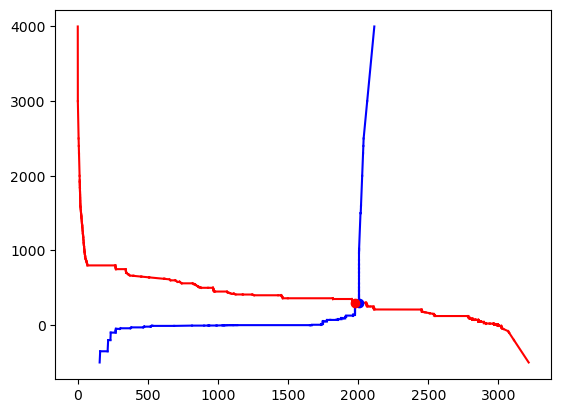

Line of intersection:
False
(2006.3000000100203, 300.0064202134488)


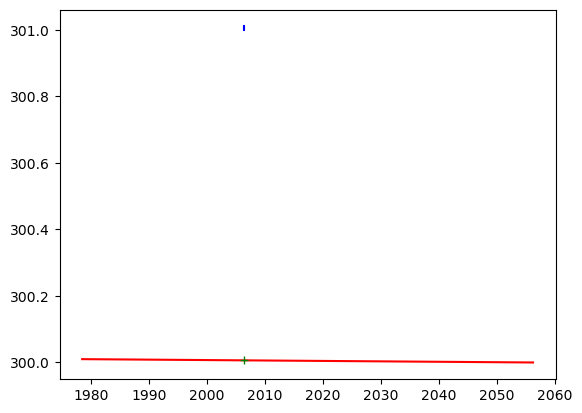

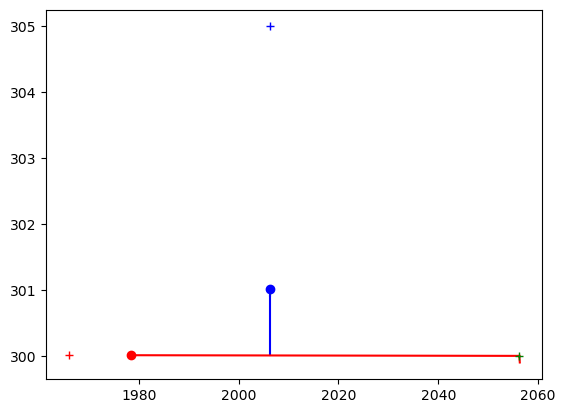

Line of intersection:
(1974.6324250611808, 300.0104921659946)


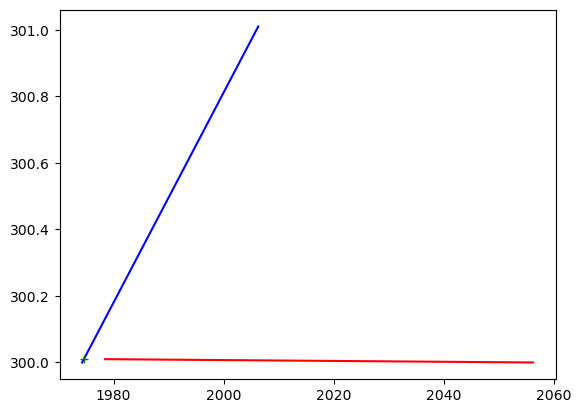

In [24]:
import csv
buyD=[]
sellD= []
# Open the CSV file in read mode
with open('2024-3-24.csv', 'r') as csvfile:
  # Create a reader object
  csv_reader = csv.reader(csvfile)
  
  # Iterate through the rows in the CSV file
  for row in csv_reader:
    # Access each element in the row
    if(str(row[1])=='17' and str(row[2])=='sellD'):
      sellD.append({'x': float(row[3]), 'y':float(row[4])})
    if(str(row[1])=='17' and str(row[2])=='buyD'):
      buyD.append({'x': float(row[3]), 'y':float(row[4])})

import matplotlib.pyplot as plt
import math

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]
    if(line1[0][0]==line1[1][0] and line2[0][0]==line2[1][0] and line1[0][0]==line2[1][0]):
        return line1[0][0], (line1[0][1]+line2[1][1])/2
    if(line1[0][1]==line1[1][1] and line2[0][1]==line2[1][1] and line1[0][1]==line2[1][1]):
        return (line1[0][0]+line2[1][0])/2, line1[0][1]
    div = det(xdiff, ydiff)
    if div == 0:
        # print("Differnece: ",xdiff, ydiff)
        return 0, 0
    #    raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y



  
# Given three collinear points p, q, r, the function checks if  
# point q lies on line segment 'pr'  
def onSegment(p, q, r): 
    if ( (q[0] <= max(p[0], r[0])) and (q[0] >= min(p[0], r[0])) and 
           (q[1] <= max(p[1], r[1])) and (q[1] >= min(p[1], r[1]))): 
        return True
    return False
  
def orientation(p, q, r): 
    # to find the orientation of an ordered triplet (p,q,r) 
    # function returns the following values: 
    # 0 : Collinear points 
    # 1 : Clockwise points 
    # 2 : Counterclockwise 
      
    # See https://www.geeksforgeeks.org/orientation-3-ordered-points/amp/  
    # for details of below formula.  
      
    val = (float(q[1] - p[1]) * (r[0] - q[0])) - (float(q[0] - p[0]) * (r[1] - q[1])) 
    if (val > 0): 
          
        # Clockwise orientation 
        return 1
    elif (val < 0): 
          
        # Counterclockwise orientation 
        return 2
    else: 
          
        # Collinear orientation 
        return 0
  
# The main function that returns true if  
# the line segment 'p1q1' and 'p2q2' intersect. 
def intersect(p1,q1,p2,q2): 
      
    # Find the 4 orientations required for  
    # the general and special cases 
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
  
    # General case 
    if ((o1 != o2) and (o3 != o4)): 
        return True
  
    # Special Cases 
  
    # p1 , q1 and p2 are collinear and p2 lies on segment p1q1 
    if ((o1 == 0) and onSegment(p1, p2, q1)): 
        return True
  
    # p1 , q1 and q2 are collinear and q2 lies on segment p1q1 
    if ((o2 == 0) and onSegment(p1, q2, q1)): 
        return True
  
    # p2 , q2 and p1 are collinear and p1 lies on segment p2q2 
    if ((o3 == 0) and onSegment(p2, p1, q2)): 
        return True
  
    # p2 , q2 and q1 are collinear and q1 lies on segment p2q2 
    if ((o4 == 0) and onSegment(p2, q1, q2)): 
        return True
  
    # If none of the cases 
    return False
   
   
   
lastX =buyD[0]['x']
lastY = buyD[0]['y']


i=1   
while i< len(buyD):
    plt.plot([lastX,buyD[i]['x']],[lastY, buyD[i]['y']],'r')
    lastX = buyD[i]['x']
    lastY = buyD[i]['y']
    i=i+1
   

i=1
lastX =sellD[0]['x']
lastY = sellD[0]['y']
lastXB = buyD[0]['x']
lastYB = buyD[0]['y']
addS=1
addB=1
sRight=1
bRight=0
if(lastX<sellD[10]['x']):sRight=1
else:sRight=0
if(lastXB<buyD[10]['x']):bRight=1
else:bRight=0
flagW =0
strogoPrediS=0
strogoPrediB=0
closestS=1
closestB=1
while i< len(sellD):
    plt.plot([lastX,sellD[i]['x']],[lastY, sellD[i]['y']],'b')
    
    j=1
    lastXB = buyD[0]['x']
    lastYB = buyD[0]['y']
    if(sRight==1 and bRight==0 or sRight==1 and bRight==1):
        # print(1)
        while j< len(buyD):
            if(sellD[i]['x']<buyD[j]['x'] and sellD[i]['y']<buyD[j]['y']and flagW ==0 ): strogoPrediS=i
                
            if(sellD[i]['x']>buyD[j]['x'] and sellD[i]['y']>buyD[j]['y']and flagW ==0 ):
                # p=0
                # while True:
                #     if(sellD[i-p-1]['x']<=buyD[j-1]['x'] and sellD[i-p-1]['y']<=buyD[j-1]['y']):break
                #     p=p+1
                # closestS=i-p
                closestS=i
                closestB=j
                flagW =1
                
            lastXB = buyD[j]['x']
            lastYB = buyD[j]['y']
            j=j+1
            if(flagW==1):break
        
        lastX = sellD[i]['x']
        lastY = sellD[i]['y']
        i=i+1
    else:
        print(2)
        while j< len(buyD):
            if(sellD[i]['x']>buyD[j]['x'] and sellD[i]['y']>buyD[j]['y']and flagW ==0 ): strogoPrediS=i
            if(sellD[i]['x']<buyD[j]['x'] and sellD[i]['y']<buyD[j]['y']and flagW ==0 ):
                # p=0
                # while True:
                #     if(sellD[i-p-1]['x']>=buyD[j-1]['x'] and sellD[i-p-1]['y']>=buyD[j-1]['y']):break
                #     p=p+1
                # closestS=i-p
                closestS=i
                closestB=j
                flagW =1
            lastXB = buyD[j]['x']
            lastYB = buyD[j]['y']
            j=j+1
            if(flagW==1):break
        lastX = sellD[i]['x']
        lastY = sellD[i]['y']
        i=i+1
#rezerven cikul 

flagW =0
i=1
while i< len(buyD):
    j=1
    if(bRight==0):
        while j< len(sellD):
            if(sellD[j]['x']<buyD[i]['x'] and sellD[j]['y']>buyD[i]['y']and flagW ==0 ): strogoPrediB=i
            if(sellD[j]['x']>buyD[i]['x'] and sellD[j]['y']<buyD[i]['y']and flagW ==0 ):
                # p=0
                # while True:
                #     if(sellD[closestS-1]['x']<=buyD[i-1-p]['x'] and sellD[closestS-1]['y']>=buyD[i-1-p]['y']):break
                #     p=p+1
                # closestB=i-p
                closestB=i
                flagW =1
            j=j+1
            if(flagW==1):break
    else:
        print("Second cycle")
        while j< len(sellD):
            if(sellD[j]['x']>buyD[i]['x'] and sellD[j]['y']<buyD[i]['y']and flagW ==0 ): strogoPrediB=i
            if(sellD[j]['x']<buyD[i]['x'] and sellD[j]['y']>buyD[i]['y']and flagW ==0 ):
                # p=0
                # while True:
                #     if(sellD[closestS-1]['x']>=buyD[i-1-p]['x'] and sellD[closestS-1]['y']<=buyD[i-1-p]['y']):break
                #     p=p+1
                # closestB=i-p
                closestB=i
                flagW =1
            j=j+1
            if(flagW==1):break
    i=i+1


# krai na rezervniq cikul  

#nachalo strogo predi strogo sled
print("Razlika mejud dvete strogi tochki sell")
print(closestS-strogoPrediS)
A= (sellD[closestS]['x'],sellD[closestS]['y'])
B= (sellD[closestS-1]['x'],sellD[closestS-1]['y'])
C= (buyD[closestB-1]['x'],buyD[closestB-1]['y'])
D= (buyD[closestB]['x'],buyD[closestB]['y'])
print(line_intersection((A, B), (C, D)))
F= (1,2)
F= line_intersection((A, B), (C, D))
if(closestS-strogoPrediS>1):
    k=closestS-strogoPrediS
    while k>1:
        print("proverka",round(F[0],5),round(A[0],5),round(F[1],5),round(A[1],5))
        # print(round(F[0],2),round(B[0],2),round(F[1],2),round(B[1],2))
        if(round(F[0],10)>round(A[0],10) or round(F[1],10)>round(A[1],10)):
            closestS= closestS+1
            print("dobavqne kum closestS")
            
        elif(round(F[0],10)<round(B[0],10) or round(F[1],10)<round(B[1],10)): 
            closestS= closestS-1
            print("izvajdane ot closestS")
        # elif(F[0]>A[0] or F[1]>A[1]):
        #     closestS= closestS+1
        #     print("dobavqne kum closestS")
        # elif(F[0]<B[0] or F[1]<B[1]): 
        #     closestS= closestS-1
        #     print("izvajdane ot closestS")
        A= (sellD[closestS]['x'],sellD[closestS]['y'])
        B= (sellD[closestS-1]['x'],sellD[closestS-1]['y'])
        F= line_intersection((A, B), (C, D))
        print(line_intersection((A, B), (C, D)))
        k=k-1

print("Razlika mejud dvete strogi tochki buy")
print(closestB-strogoPrediB)       
if(closestB-strogoPrediB>1):
    k=closestB-strogoPrediB
    while k>1:
        if(round(F[0],10)<round(D[0],10) or round(F[1],10)>round(D[1],10)):
            closestB= closestB+1
            print("dobavqne kum closestB")
            
        elif(round(F[0],10)>round(C[0],10) or round(F[1],10)<round(C[1],10)): 
            closestB= closestB-1
            print("izvajdane ot closestB")
        # elif(F[0]<D[0] or F[1]>D[1]):
        #     closestB= closestB+1
        #     print("dobavqne kum closestB")
            
        # elif(F[0]>C[0] or F[1]<D[1]): 
        #     closestB= closestB-1
        #     print("izvajdane ot closestB")
        C= (buyD[closestB-1]['x'],buyD[closestB-1]['y'])
        D= (buyD[closestB]['x'],buyD[closestB]['y'])
        F= line_intersection((A, B), (C, D))
        print(line_intersection((A, B), (C, D)))
        k=k-1

#krai strogo predi strogo sled
#nachalo na donagajdene
# p=0
# if(sRight==1 and bRight==0 or sRight==1 and bRight==1):
#     while True:
#         if(sellD[closestS-p-1]['x']<=buyD[closestB-1]['x'] and sellD[closestS-p-1]['y']<=buyD[closestB-1]['y']):break
#         p=p+1
#     closestS=i-p
# else:
#     while True:
#         if(sellD[closestS-p-1]['x']>=buyD[closestB-1]['x'] and sellD[closestS-p-1]['y']>=buyD[closestB-1]['y']):break
#         p=p+1
#     closestS=i-p   
#krai na donagajdane


# closestB= closestB-1
# closestS =closestS-1
print("Sell closest")
print(sellD[closestS-1]['x'],sellD[closestS-1]['y'])
print(sellD[closestS]['x'],sellD[closestS]['y'])
print(sellD[closestS+1]['x'],sellD[closestS+1]['y'])
print("Buy closest")
print(buyD[closestB-1]['x'],buyD[closestB-1]['y'])
print(buyD[closestB]['x'],buyD[closestB]['y'])
print(buyD[closestB+1]['x'],buyD[closestB+1]['y'])
plt.plot(sellD[closestS]['x'],sellD[closestS]['y'],"bo")
plt.plot(buyD[closestB]['x'],buyD[closestB]['y'],"ro")           
plt.show()
plt.cla()
# imam kordinatite na dvete nai blizki tochki ot dvete grafi, sega trqbva da namerq smrqmo tqhnata lokaciq v kakva posoka e presechnata tochka i
# eventualno da napravq nov plot samo na uchastaka ot dvete nai blizki tochki i vtorite po blizost dve tochki


print("Line of intersection:")
plt.plot([sellD[closestS]['x'],sellD[closestS-1]['x']],[sellD[closestS]['y'],sellD[closestS-1]['y']],"b")
plt.plot([buyD[closestB]['x'],buyD[closestB-1]['x']],[buyD[closestB]['y'],buyD[closestB-1]['y']],"r")
A= (sellD[closestS]['x'],sellD[closestS]['y'])
B= (sellD[closestS-1]['x'],sellD[closestS-1]['y'])
C= (buyD[closestB-1]['x'],buyD[closestB-1]['y'])
D= (buyD[closestB]['x'],buyD[closestB]['y'])
print(intersect(A,B,C,D))
print(line_intersection((A, B), (C, D)))
F= (1,2)
F= line_intersection((A, B), (C, D))
plt.plot(F[0],F[1],"g+")
plt.show()
plt.cla()
k=-3
while k<0:
    plt.plot([sellD[closestS+k]['x'],sellD[closestS+k+1]['x']],[sellD[closestS+k]['y'],sellD[closestS+k+1]['y']],"b")
    plt.plot([buyD[closestB+k]['x'],buyD[closestB+k+1]['x']],[buyD[closestB+k]['y'],buyD[closestB+k+1]['y']],"r")
    k=k+1
plt.plot(sellD[closestS-1]['x'],sellD[closestS-1]['y'],"g+")
plt.plot(sellD[closestS]['x'],sellD[closestS]['y'],"bo")
plt.plot(sellD[closestS+1]['x'],sellD[closestS+1]['y'],"b+")
plt.plot(buyD[closestB-1]['x'],buyD[closestB-1]['y'],"g+")
plt.plot(buyD[closestB]['x'],buyD[closestB]['y'],"ro")
plt.plot(buyD[closestB+1]['x'],buyD[closestB+1]['y'],"r+")
# plt.plot(F[0],F[1],"go")   
plt.show()
plt.cla()


#s metoda za strogo sled i strogo predi
print("Line of intersection:")
plt.plot([sellD[closestS]['x'],sellD[strogoPrediS]['x']],[sellD[closestS]['y'],sellD[strogoPrediS]['y']],"b")
plt.plot([buyD[closestB]['x'],buyD[strogoPrediB]['x']],[buyD[closestB]['y'],buyD[strogoPrediB]['y']],"r")
A= (sellD[closestS]['x'],sellD[closestS]['y'])
B= (sellD[strogoPrediS]['x'],sellD[strogoPrediS]['y'])
C= (buyD[strogoPrediB]['x'],buyD[strogoPrediB]['y'])
D= (buyD[closestB]['x'],buyD[closestB]['y'])
print(line_intersection((A, B), (C, D)))
F= (1,2)
F= line_intersection((A, B), (C, D))
plt.plot(F[0],F[1],"g+")
plt.show()


In [79]:
import json
import os
# import numpy as np
# import matplotlib.pyplot as plt
# import math
import pandas as pd
import datetime
import xlsxwriter

workbook = xlsxwriter.Workbook("IntersectionByHour.xlsx")
bold = workbook.add_format({'bold': True})
worksheet1 = workbook.add_worksheet()
r= 0
worksheet1.write(0, 0, "Hour", bold)
while r<24:
    worksheet1.write(r+1, 0, r)
    r=r+1

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

date = datetime.datetime.now()
date = date - datetime.timedelta(hours=0)

df = pd.DataFrame()
# df.insert(0,"Hour",range(int(24)))
columnNum=0
# jsonName ="2024-3-10_22.json"
flagInt=0
while flagInt<3:
    day=str(date.year)+'-'+str(date.month)+'-'+str(date.day)+ "_"+str(date.hour)
    dfRow=int(date.hour) 
    dfColumn =str(date.year)+'-'+str(date.month)+'-'+str(date.day) 
    jsonName = day+'.json'
    path = './'+day+'.json'
    if(dfColumn in df.columns)==False:
        df.insert(columnNum,dfColumn,'NA')
        columnNum= columnNum+1
        worksheet1.write(0, columnNum, dfColumn, bold)
    date = date - datetime.timedelta(hours=1)
    if(os.path.isfile(path)==False):
        flagInt= flagInt+1
        print(path)
        break

    try:
        f= open(jsonName)
    except FileNotFoundError:
        break
    else:
        with f:
            try:
                data = json.load(f)
                sellD = data["sellData"]
                buyD = data["buyData"]
            except:
                print(jsonName)
                continue

    
    # lastX =buyD[0]['x']
    # lastY = buyD[0]['y']


    # i=1   
    # while i< len(buyD):
    #     plt.plot([lastX,buyD[i]['x']],[lastY, buyD[i]['y']],'r')
    #     lastX = buyD[i]['x']
    #     lastY = buyD[i]['y']
    #     i=i+1
    

    i=1
    lastX =sellD[0]['x']
    lastY = sellD[0]['y']
    lastXB = buyD[0]['x']
    lastYB = buyD[0]['y']
    sRight=1
    bRight=0
    if(lastX<sellD[100]['x']):sRight=1
    else:sRight=0
    if(lastXB<buyD[100]['x']):bRight=1
    else:bRight=0
    flagW =0
    strogoPrediS=0
    strogoPrediB=0
    closestS=1
    closestB=1
    while i< len(sellD):
        # plt.plot([lastX,sellD[i]['x']],[lastY, sellD[i]['y']],'b')
        
        j=1
        # lastXB = buyD[0]['x']
        # lastYB = buyD[0]['y']
        if(sRight==1 and bRight==0 or sRight==1 and bRight==1):
            while j< len(buyD):
                if(sellD[i]['x']<buyD[j]['x'] and sellD[i]['y']<buyD[j]['y']and flagW ==0 ): strogoPrediS=i
                    
                if(sellD[i]['x']>=buyD[j]['x'] and sellD[i]['y']>=buyD[j]['y']and flagW ==0 ):
                    closestS=i
                    closestB=j
                    flagW =1
                    
                # lastXB = buyD[j]['x']
                # lastYB = buyD[j]['y']
                j=j+1
                if(flagW==1):break
            
            # lastX = sellD[i]['x']
            # lastY = sellD[i]['y']
            i=i+1
        else:
            # print(2)
            while j< len(buyD):
                if(sellD[i]['x']>buyD[j]['x'] and sellD[i]['y']>buyD[j]['y']and flagW ==0 ): strogoPrediS=i
                if(sellD[i]['x']<=buyD[j]['x'] and sellD[i]['y']<=buyD[j]['y']and flagW ==0 ):
                    closestS=i
                    closestB=j
                    flagW =1
                # lastXB = buyD[j]['x']
                # lastYB = buyD[j]['y']
                j=j+1
                if(flagW==1):break
            # lastX = sellD[i]['x']
            # lastY = sellD[i]['y']
            i=i+1
    #rezerven cikul 

    flagW =0
    i=1
    while i< len(buyD):
        j=1
        if(bRight==0):
            while j< len(sellD):
                if(sellD[j]['x']<buyD[i]['x'] and sellD[j]['y']>buyD[i]['y']and flagW ==0 ): strogoPrediB=i
                if(sellD[j]['x']>=buyD[i]['x'] and sellD[j]['y']<=buyD[i]['y']and flagW ==0 ):
                    closestB=i
                    flagW =1
                j=j+1
                if(flagW==1):break
        else:
            while j< len(sellD):
                if(sellD[j]['x']>buyD[i]['x'] and sellD[j]['y']<buyD[i]['y']and flagW ==0 ): strogoPrediB=i
                if(sellD[j]['x']<=buyD[i]['x'] and sellD[j]['y']>=buyD[i]['y']and flagW ==0 ):
                    closestB=i
                    flagW =1
                j=j+1
                if(flagW==1):break
        i=i+1


    # krai na rezervniq cikul  

    #nachalo strogo predi strogo sled
    # print("Razlika mejud dvete strogi tochki sell")
    # print(closestS-strogoPrediS)
    A= (sellD[closestS]['x'],sellD[closestS]['y'])
    B= (sellD[closestS-1]['x'],sellD[closestS-1]['y'])
    C= (buyD[closestB-1]['x'],buyD[closestB-1]['y'])
    D= (buyD[closestB]['x'],buyD[closestB]['y'])
    # print(line_intersection((A, B), (C, D)))
    F= (1,2)
    F= line_intersection((A, B), (C, D))
    if(closestS-strogoPrediS>1):
        k=closestS-strogoPrediS
        while k>1:
            # print(round(F[0],2),round(A[0],2),round(F[1],2),round(A[1],2))
            if(round(F[0],2)>round(A[0],2) or round(F[1],2)>round(A[1],2)):
                closestS= closestS+1
                # print("dobavqne kum closestS")
            elif(round(F[0],2)<round(B[0],2) or round(F[1],2)<round(B[1],2)): 
                closestS= closestS-1
                # print("izvajdane ot closestS")
            A= (sellD[closestS]['x'],sellD[closestS]['y'])
            B= (sellD[closestS-1]['x'],sellD[closestS-1]['y'])
            F= line_intersection((A, B), (C, D))
            # print(line_intersection((A, B), (C, D)))
            k=k-1

    # print("Razlika mejud dvete strogi tochki buy")
    # print(closestB-strogoPrediB)       
    if(closestB-strogoPrediB>1):
        k=closestB-strogoPrediB
        while k>1:
            if(round(F[0],2)<round(D[0],2) or round(F[1],2)>round(D[1],2)):
                closestB= closestB+1
                # print("dobavqne kum closestB")
                
            elif(round(F[0],2)>round(C[0],2) or round(F[1],2)<round(C[1],2)): 
                closestB= closestB-1
                # print("izvajdane ot closestB")
            C= (buyD[closestB-1]['x'],buyD[closestB-1]['y'])
            D= (buyD[closestB]['x'],buyD[closestB]['y'])
            F= line_intersection((A, B), (C, D))
            # print(line_intersection((A, B), (C, D)))
            k=k-1

    #krai strogo predi strogo sled

    # print("Sell closest")
    # print(sellD[closestS-1]['x'],sellD[closestS-1]['y'])
    # print(sellD[closestS]['x'],sellD[closestS]['y'])
    # print(sellD[closestS+1]['x'],sellD[closestS+1]['y'])
    # print("Buy closest")
    # print(buyD[closestB-1]['x'],buyD[closestB-1]['y'])
    # print(buyD[closestB]['x'],buyD[closestB]['y'])
    # print(buyD[closestB+1]['x'],buyD[closestB+1]['y'])
    # plt.plot(sellD[closestS]['x'],sellD[closestS]['y'],"bo")
    # plt.plot(buyD[closestB]['x'],buyD[closestB]['y'],"ro")           
    # plt.show()
    # plt.cla()
    # imam kordinatite na dvete nai blizki tochki ot dvete grafi, sega trqbva da namerq smrqmo tqhnata lokaciq v kakva posoka e presechnata tochka i
    # eventualno da napravq nov plot samo na uchastaka ot dvete nai blizki tochki i vtorite po blizost dve tochki


    # print("Line of intersection:")
    # plt.plot([sellD[closestS]['x'],sellD[closestS-1]['x']],[sellD[closestS]['y'],sellD[closestS-1]['y']],"b")
    # plt.plot([buyD[closestB]['x'],buyD[closestB-1]['x']],[buyD[closestB]['y'],buyD[closestB-1]['y']],"r")
    A= (sellD[closestS]['x'],sellD[closestS]['y'])
    B= (sellD[closestS-1]['x'],sellD[closestS-1]['y'])
    C= (buyD[closestB-1]['x'],buyD[closestB-1]['y'])
    D= (buyD[closestB]['x'],buyD[closestB]['y'])
    result = line_intersection((A, B), (C, D))
    # print(round(result[0],2),round(result[1],2))
    # df.at[dfRow, dfColumn] = str(round(result[0],2))+"/ "+str(round(result[1],2))
    text = str(round(result[0],2))+"/ "+str(round(result[1],2))
    worksheet1.write(dfRow+1, columnNum, text)
    
# df.sort_values("Hour")
# print(df)    
worksheet1.set_column(1, columnNum, 20)
workbook.close()
# F= (1,2)
# F= line_intersection((A, B), (C, D))
# plt.plot(F[0],F[1],"g+")
# plt.show()
# plt.cla()
# k=-3
# while k<30:
#     plt.plot([sellD[closestS+k]['x'],sellD[closestS+k+1]['x']],[sellD[closestS+k]['y'],sellD[closestS+k+1]['y']],"b")
#     plt.plot([buyD[closestB+k]['x'],buyD[closestB+k+1]['x']],[buyD[closestB+k]['y'],buyD[closestB+k+1]['y']],"r")
#     k=k+1
# plt.plot(sellD[closestS-1]['x'],sellD[closestS-1]['y'],"g+")
# plt.plot(sellD[closestS]['x'],sellD[closestS]['y'],"bo")
# plt.plot(sellD[closestS+1]['x'],sellD[closestS+1]['y'],"b+")
# plt.plot(buyD[closestB-1]['x'],buyD[closestB-1]['y'],"g+")
# plt.plot(buyD[closestB]['x'],buyD[closestB]['y'],"ro")
# plt.plot(buyD[closestB+1]['x'],buyD[closestB+1]['y'],"r+")
# # plt.plot(F[0],F[1],"go")   
# plt.show()
# plt.cla()


# #s metoda za strogo sled i strogo predi
# print("Point of intersection:")
# plt.plot([sellD[closestS]['x'],sellD[strogoPrediS]['x']],[sellD[closestS]['y'],sellD[strogoPrediS]['y']],"b")
# plt.plot([buyD[closestB]['x'],buyD[strogoPrediB]['x']],[buyD[closestB]['y'],buyD[strogoPrediB]['y']],"r")
# A= (sellD[closestS]['x'],sellD[closestS]['y'])
# B= (sellD[strogoPrediS]['x'],sellD[strogoPrediS]['y'])
# C= (buyD[strogoPrediB]['x'],buyD[strogoPrediB]['y'])
# D= (buyD[closestB]['x'],buyD[closestB]['y'])
# print(line_intersection((A, B), (C, D)))
# F= (1,2)
# F= line_intersection((A, B), (C, D))
# plt.plot(F[0],F[1],"g+")
# plt.show()


2024-3-31_2.json
2024-2-16_23.json
2024-2-16_22.json
2024-2-16_21.json
2024-2-16_20.json
2024-2-16_19.json
2024-2-16_18.json
2024-2-16_17.json
./2024-2-16_16.json


In [80]:

file_name = 'IntersectionByHour1.xlsx'


df.to_excel(file_name)

print('DataFrame is written to Excel File successfully.')



DataFrame is written to Excel File successfully.
